# PIR - Predictions for recent stations

## 1: Imports

In [ ]:
import sys
import os
# Add the parent directory to the Python path
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname(__file__), ".."))
)

In [103]:
# Import Libraries
import pandas as pd
import numpy as np

import importlib
import utils
import modelsRecent

In [104]:
# In case of 'utils.py' modifications
importlib.reload(utils)

<module 'utils' from '/home/pedoussa/Bureau/PIR 5A _ 15-01-2026/RECENT STATIONS/utils.py'>

---

## 2: Backtest on 2022 data

### 2.1: Data Preparation

In [105]:
# Load Data
x_train = x_train = pd.read_csv('train_f_x.csv')
y_train = pd.read_csv('y_train_sncf.csv')

In [ ]:
RECENT_STATIONS = ['P6E', 'BDC', 'W80'] # W14 and QD6 are treated in anothers notebooks

def filter_stations(data_dict, stations_to_include):
    return {
        station: df for station, df in data_dict.items() 
        if station in stations_to_include
    }

In [107]:
# Data Preparation
df = utils.prepare_backtest_data(x_train, y_train, remove_covid=True)

# Extract recent stations data
df_recent = filter_stations(df, RECENT_STATIONS)

# Split into train and test dataset
df_train = {}
df_test = {}
for station in df_recent:
    df_train_station, df_test_station = utils.split_dataset(df_recent[station], cut_date='2022-10-25')
    df_train[station] = df_train_station
    df_test[station] = df_test_station

In [108]:
df_test_rnn = {
    station: df_test[station].copy()
    for station in df_test.keys()
}

df_test_lstm = {
    station: df_test[station].copy()
    for station in df_test.keys()
}

# Keep true values 
df_test_true = {
    station: df_test[station].copy()
    for station in df_test.keys()
}

In [109]:
# Verification
print("len(df_train):",len(df_train),":",df_train.keys())
print("len(df_test):",len(df_test),":",df_test.keys())
print("len(df_test_true):",len(df_test_true),":",df_test_true.keys())

len(df_train): 3 : dict_keys(['P6E', 'BDC', 'W80'])
len(df_test): 3 : dict_keys(['P6E', 'BDC', 'W80'])
len(df_test_true): 3 : dict_keys(['P6E', 'BDC', 'W80'])


### 2.2: Predictions

In [110]:
# Best Hyperparameters for RNN: {'units': 50, 'learning_rate': 0.004511134598760262, 'batch_size': 15, 'seq_len': 25}
# Best MAPE: 0.3443
#
# Best Hyperparameters for LSTM: {'units': 50, 'learning_rate': 0.00010728642971712255, 'batch_size': 15, 'seq_len': 25}
# Best MAPE: 0.4241

In [111]:
# Parameters for RNN
units = 50
learning_rate = 0.004511134598760262
batch_size = 15
seq_len = 25

activation = 'tanh'
epochs = 100

In [161]:
# In case of 'modelsRecent.py' modifications
importlib.reload(modelsRecent)

<module 'modelsRecent' from '/home/pedoussa/Bureau/PIR 5A _ 15-01-2026/RECENT STATIONS/modelsRecent.py'>

In [113]:
# Run RNN prediction pipeline
df_predicted_rnn, mape_result_rnn, losses_rnn = modelsRecent.backtest_model(df_train,
                                                             df_test_rnn,
                                                             df_test_true,
                                                             seq_len, units, activation, learning_rate, batch_size,
                                                             epochs, keep_percentage=0.5, early_stop = True,
                                                             features = ['job', 'ferie', 'vacances'],
                                                             architecture = 'rnn')

1/3 Station P6E
Shape X_learn: (35, 25, 3)
Shape X_val: (9, 25, 3)
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step
2/3 Station BDC
Shape X_learn: (35, 25, 3)
Shape X_val: (9, 25, 3)
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step
3/3 Station W80
Shape X_learn: (30, 25, 3)
Shape X_val: (8, 25, 3)
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step


In [114]:
# Parameters for LSTM
units = 50
learning_rate = 0.00010728642971712255
batch_size = 15
seq_len = 20

activation = 'tanh'
epochs = 100

In [115]:
# Run RNN prediction pipeline
df_predicted_lstm, mape_result_lstm, losses_lstm = modelsRecent.backtest_model(df_train,
                                                             df_test_lstm,
                                                             df_test_true,
                                                             seq_len, units, activation, learning_rate, batch_size,
                                                             epochs, keep_percentage=0.5, early_stop = True,
                                                             features = ['job', 'ferie', 'vacances'],
                                                             architecture = 'lstm')

1/3 Station P6E
Shape X_learn: (37, 20, 3)
Shape X_val: (10, 20, 3)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/3 Station BDC
Shape X_learn: (37, 20, 3)
Shape X_val: (10, 20, 3)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
3/3 Station W80
Shape X_learn: (32, 20, 3)
Shape X_val: (9, 20, 3)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


### 1.3: Explore Results

RNN Model
MAPE per station:
  station      MAPE
0     P6E  0.521193
1     BDC  0.347122
2     W80  0.480719

Average MAPE over all stations: 0.4497

LSTM model
MAPE per station:
  station      MAPE
0     P6E  0.604699
1     BDC  0.386783
2     W80  0.365887

Average MAPE over all stations: 0.4525


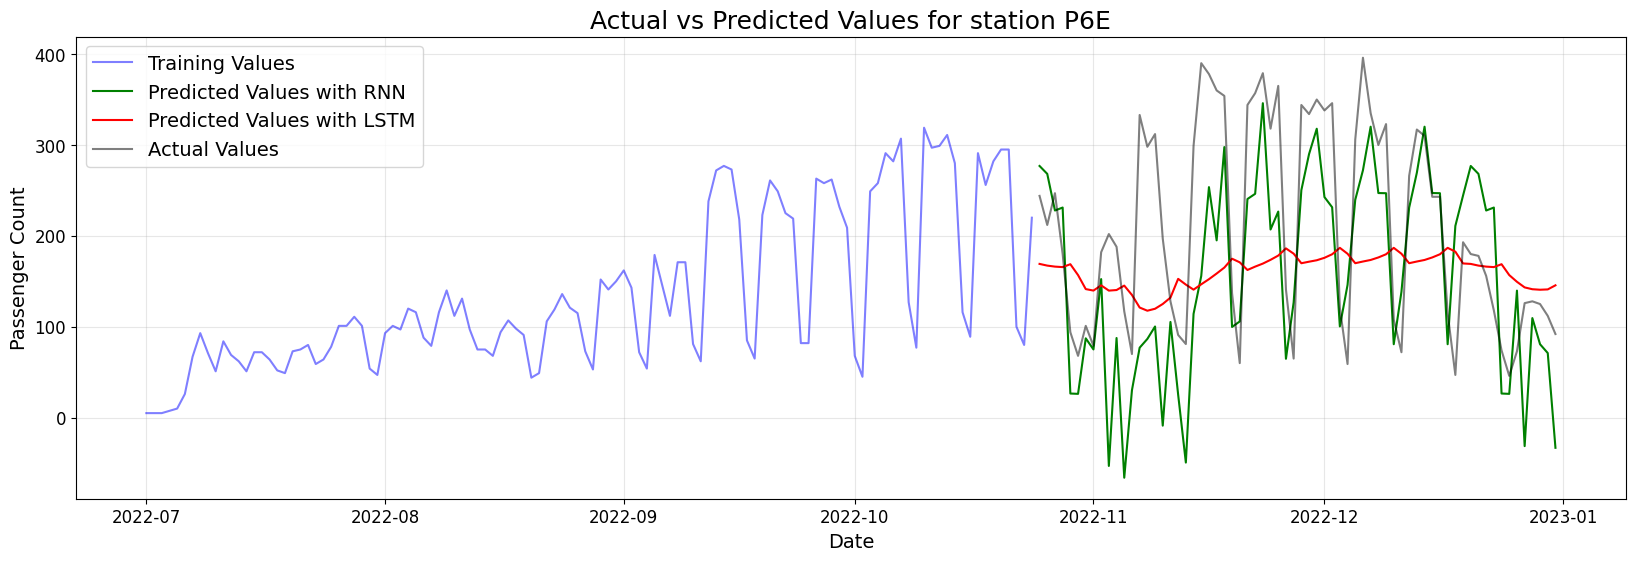

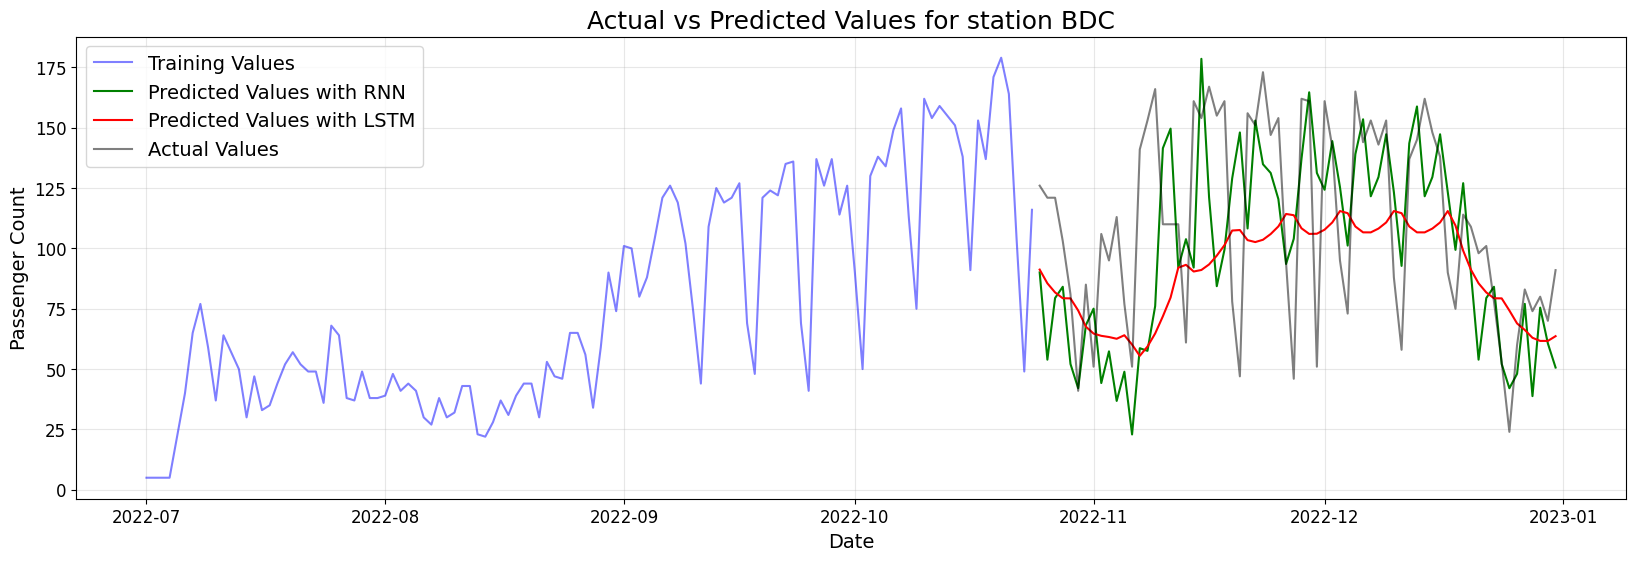

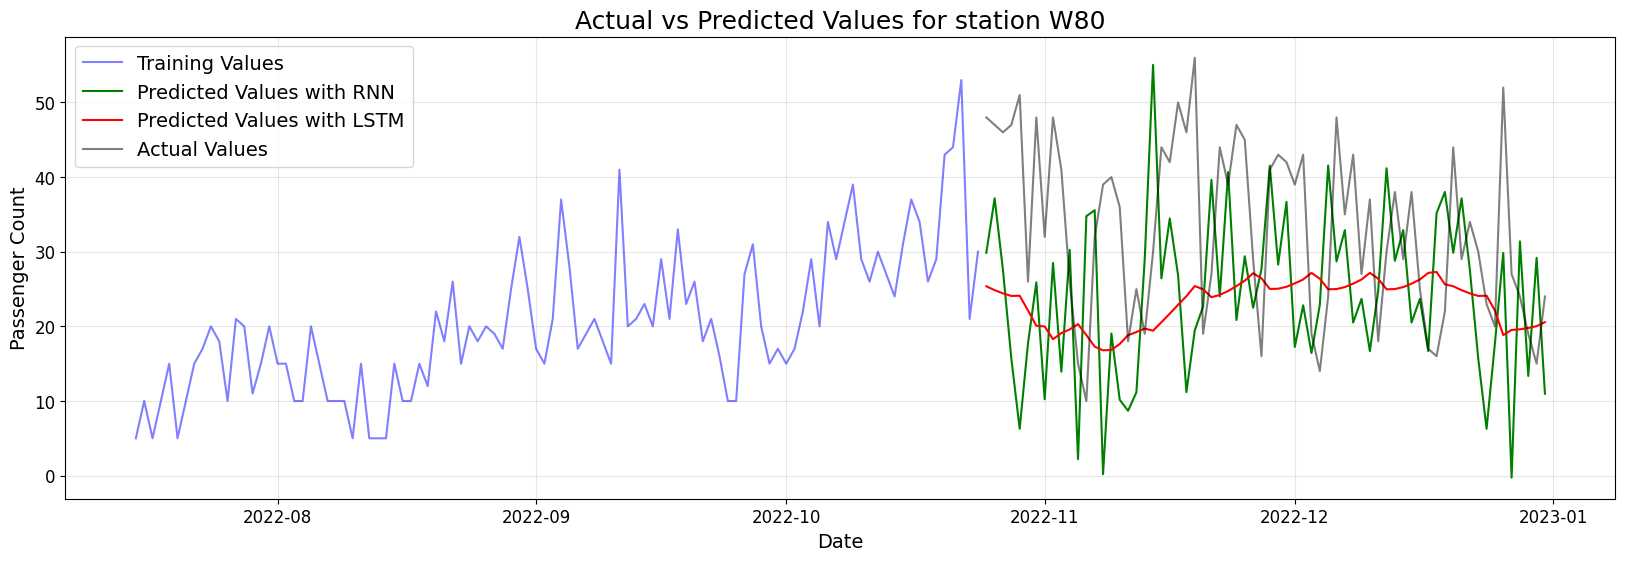

In [116]:
# Show MAPE results
print("RNN Model")
utils.show_mape_results(mape_result_rnn)
print(f"\nLSTM model")
utils.show_mape_results(mape_result_lstm)

# Show predictions
for station in df_train.keys():
    # We extract the specific dataframe for 'station' from each dictionary
    modelsRecent.show_predictions_two_results_one_station(
        df_train[station],            
        df_predicted_rnn[station],    
        df_predicted_lstm[station],   
        df_test_true[station],        
        station,                      
        'RNN', 
        'LSTM'
    )

## 3: Attempt for submission

### 3.1: Prepare Data

In [171]:
# Load Data
x_train = x_train = pd.read_csv('train_f_x.csv')
y_train = pd.read_csv('y_train_sncf.csv')
x_test = pd.read_csv('x_test.csv')

In [172]:
# Create test and train dictionnaries per station
df_train, df_test = utils.prepare_submission_data(x_train, y_train, x_test, remove_covid=True)

In [173]:
df_train_recent = filter_stations(df_train, RECENT_STATIONS)
df_test_recent = filter_stations(df_test, RECENT_STATIONS)

In [174]:
# Create df_predicted to store predictions
df_predicted = utils.create_y_attempt(x_test)

### 2.2: Predictions

In [175]:
# Parameters for RNN
units = 50
learning_rate = 0.004511134598760262
batch_size = 15
seq_len = 25

activation = 'tanh'
epochs = 100

In [176]:
# Run RNN prediction pipeline
df_predicted_recent, all_losses = modelsRecent.submission_model(df_train_recent,
                                                             df_test_recent,
                                                             df_predicted,
                                                             seq_len, units, activation, learning_rate, batch_size,
                                                             epochs, keep_percentage=1, early_stop = True,
                                                             features = ['job', 'ferie', 'vacances'],
                                                             architecture = 'rnn')

1/3 Station BDC
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
2/3 Station P6E
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
3/3 Station W80
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


In [ ]:
# Export results
# df_predicted_recent.to_csv('RECENTpredictions.csv', index=False)

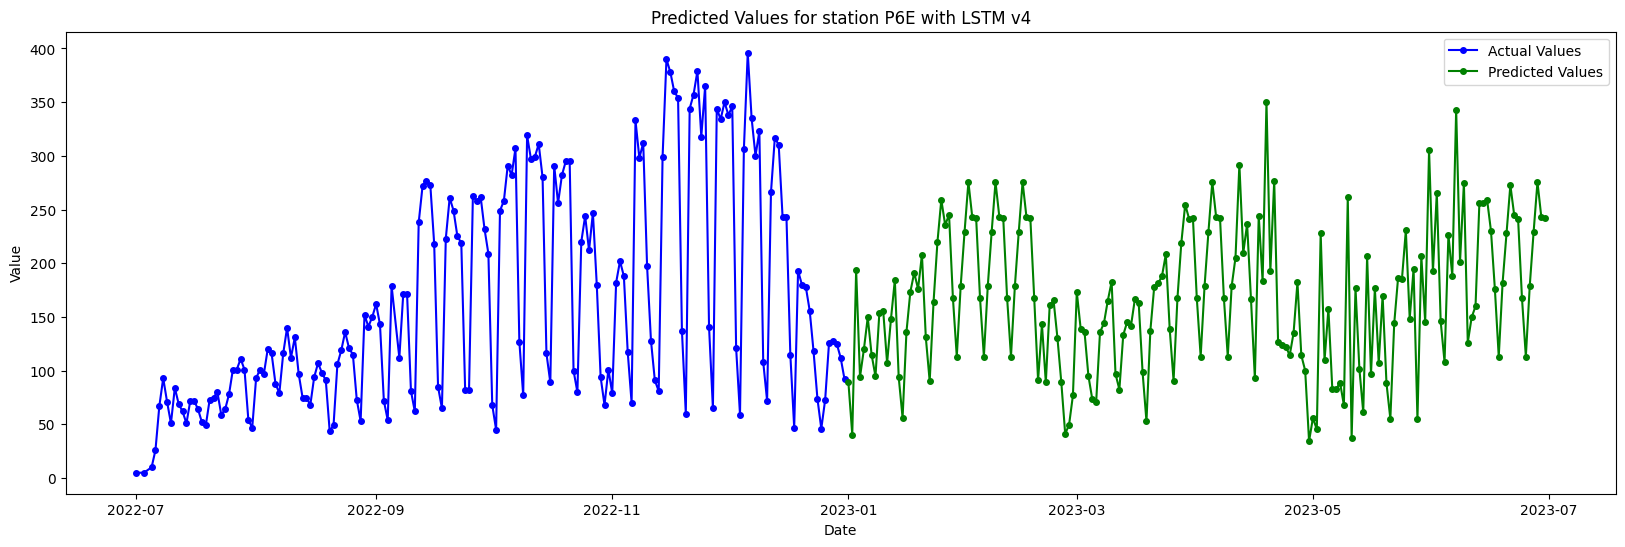

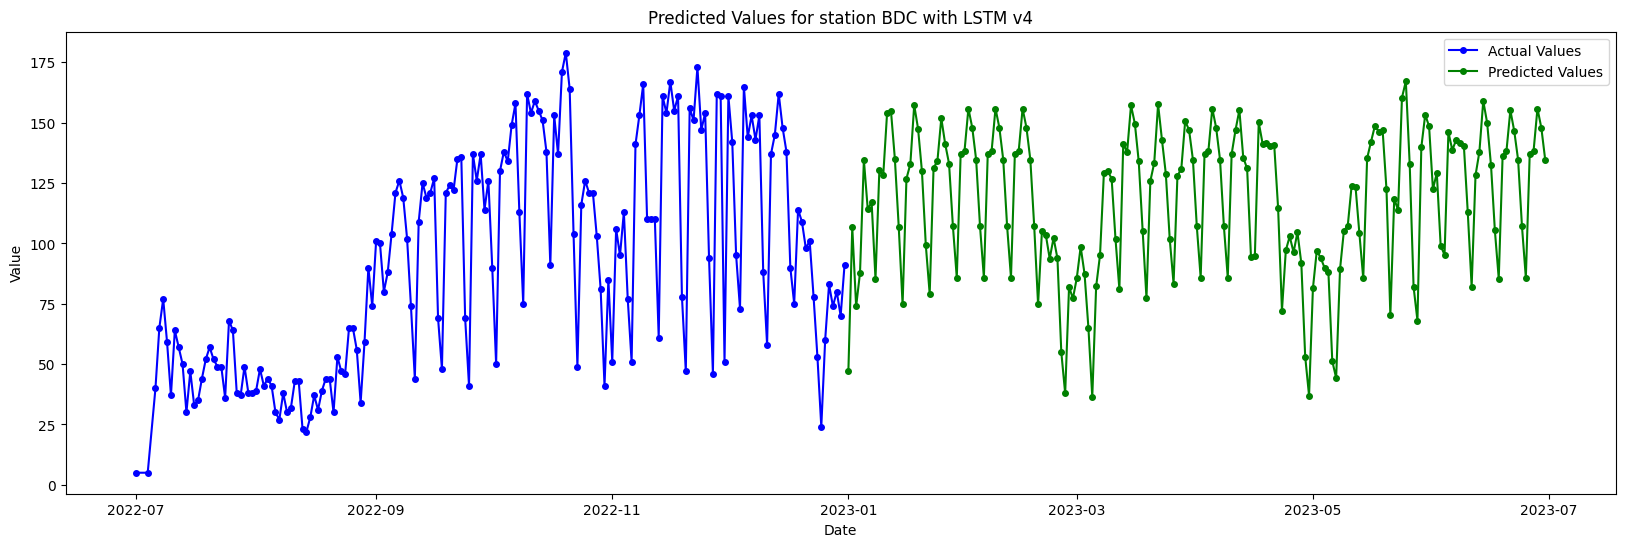

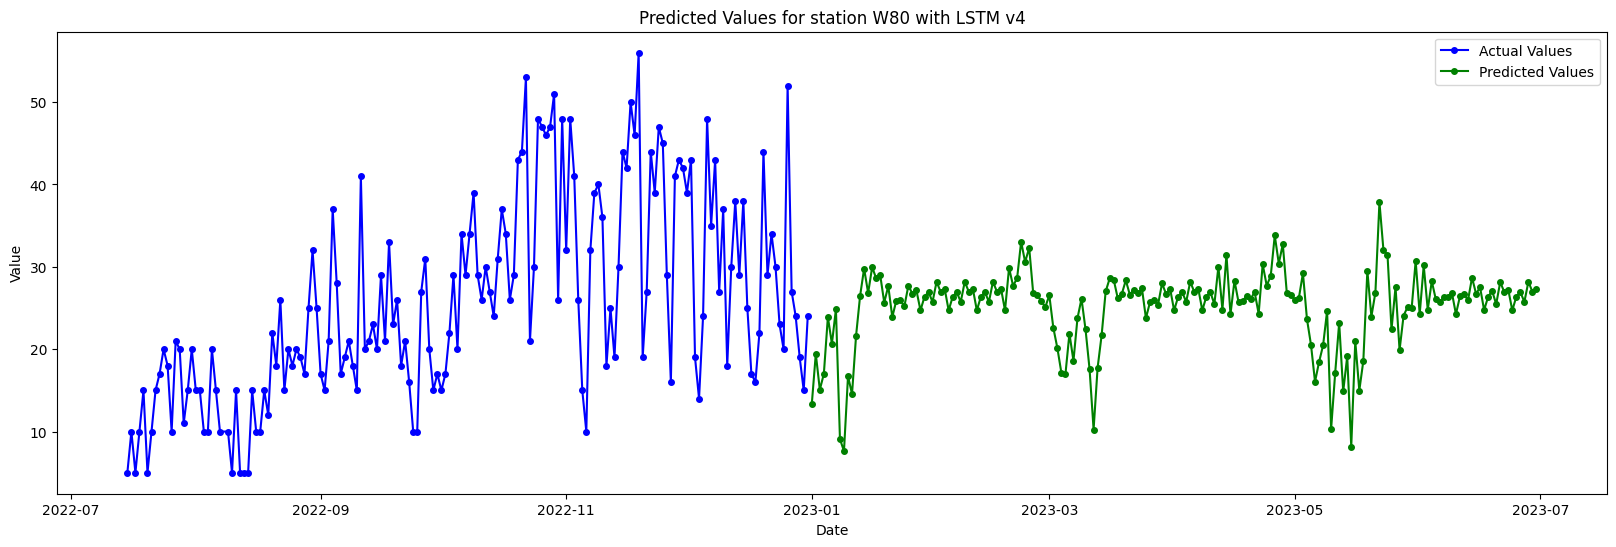

In [179]:
for station in df_train_recent.keys():
    
    # 1. Filter the big prediction DataFrame
    df_pred_station = df_predicted_recent[df_predicted_recent['index'].str.contains(station)].copy()
    
    # 2. FIX: Extract the 'date' from the 'index' column
    # This splits "2023-01-01_P6E" and takes the first part "2023-01-01"
    df_pred_station['date'] = pd.to_datetime(df_pred_station['index'].str.split('_').str[0])
    
    # 3. Call the plot function
    modelsRecent.show_prediction(
        df_train_recent[station],   
        df_pred_station,            
        station,                    
        'LSTM v4',                  
        '2021-01-01'                
    )